## Análisis exploratorio

### Base de datos
 
La base de datos de empresas afiliadas a la mutual con registro de accidentes laborales entre los años xxx y xxx, contiene xxx columnas y xxx observaciones. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import cross_validate

import missingno as msngo
import warnings

from IPython.display import display, Markdown

#from utils import get_graph, get_graph_2D
#from preproc_nyc_sqf import create_suitable_dataframe

pd.set_option("display.max_rows", 112)
pd.set_option("display.max_info_columns", 112)
pd.set_option("display.max_colwidth", 3000)

warnings.filterwarnings('ignore')

from datetime import date
from datetime import datetime

In [2]:
# Importa df

df = pd.read_csv("base_proyectoV3_20200125_v1.csv", sep=";", parse_dates=['ADHR_FECHA_INICIO_VIGENCIA','ADHR_FECHA_TERMINO','ADHR_FECHA_INICIO_CORR'])

In [3]:
#visualizacion de variables

display(Markdown("**Base de datos original**: Tiene {} columnas y {} ".format(df.shape[1], df.shape[0])))
display(Markdown("**Algunas observaciones de la base de datos original**"))
display(df.sample(10,random_state=1314).T)

**Base de datos original**: Tiene 17 columnas y 243868 

**Algunas observaciones de la base de datos original**

,187636,55507,59883,22640,22193,6009,204439,198306,42435,139878
ADHR_NUMERO,242159,100461,105165,83883,81136,66655,258638,249580,86764,194471
ADHR_ESTADO,A,A,E,E,E,E,E,A,A,E
ACEC_CODIGO,93101,61911,50021,71312,63111,50037,71141,93101,83101,50031
CLSF_CLASIFICACION,ESTABLECIMIENTOS DE ENSENANZA PRIMARIA,MAYORISTA DE FRUTAS Y VERDURAS,OBRAS DE INGENIERIA,OTRAS ACTIVIDADES CONEXAS AL TRANSPORTE N.C.P,RESTAURANTES,"OBRAS MENORES EN CONSTRUCCION (CONTRATISTAS,",TRANSPORTE DE CARGA POR CARRETERA,ESTABLECIMIENTOS DE ENSENANZA PRIMARIA,CONSEJO DE ADMINISTRACION DE EDIFICIOS Y COND,"OBRAS MENORES EN CONSTRUCCION (CONTRATISTAS,"
ADHR_COMUNA,MAIPU,PEDRO AGUIRRE CERDA,SAN BERNARDO,PROVIDENCIA,QUILLOTA,IQUIQUE,SANTIAGO,CHILLAN VIEJO,PUENTE ALTO,PROVIDENCIA
ADHR_SEGMENTO,PYME,PYME,PYME,PYME,PYME,CORP,INDEP,PYME,PYME,PYME
ADHR_TASA_INGRESO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADHR_MASA_PRESUNTA,20,19,125,3,9,0,1,39,1,7
ADHR_MACROSEGMENTO,PYME,PYME,PYME,PYME,PYME,PYME,TI,PYME,PYME,PYME
ADHR_CCHC,0,0,0,0,0,0,0,0,0,0


<Figure size 288x288 with 0 Axes>

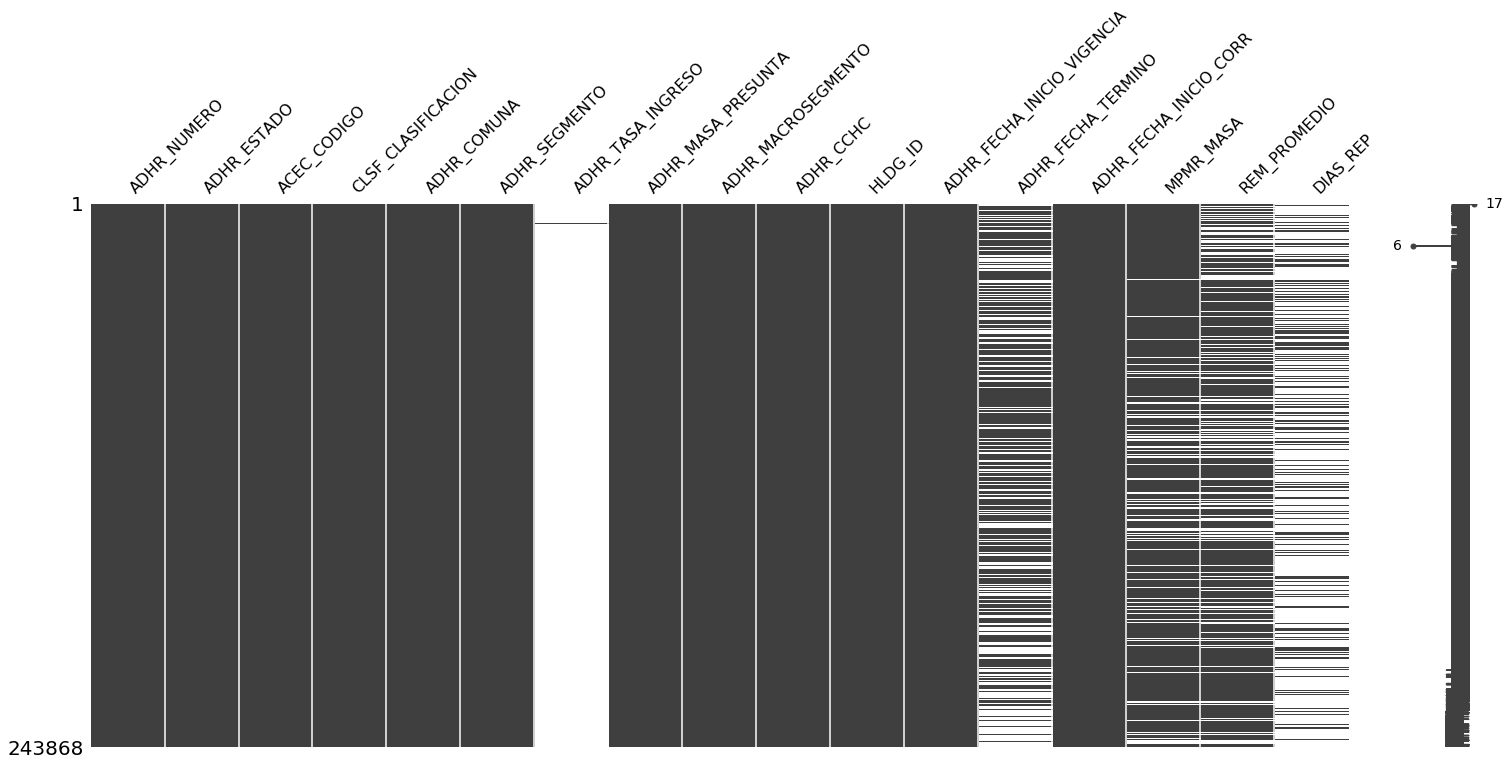

In [4]:
# analisis perdidos

plt.figure(figsize=(4,4))
msngo.matrix(df.replace(['NaN'], [np.nan]));

In [5]:
#cuenta cantidad de nulos

df.isnull().sum(axis = 0)

ADHR_NUMERO                        0
ADHR_ESTADO                        0
ACEC_CODIGO                        0
CLSF_CLASIFICACION                 1
ADHR_COMUNA                        1
ADHR_SEGMENTO                      0
ADHR_TASA_INGRESO             243817
ADHR_MASA_PRESUNTA                 1
ADHR_MACROSEGMENTO                 0
ADHR_CCHC                          1
HLDG_ID                            0
ADHR_FECHA_INICIO_VIGENCIA         1
ADHR_FECHA_TERMINO             94437
ADHR_FECHA_INICIO_CORR             1
MPMR_MASA                      34677
REM_PROMEDIO                   65350
DIAS_REP                      172136
dtype: int64

In [6]:
#para ver el tipo de variable

def tipo_variable (DataFrame):
        for i in DataFrame.columns:
           print("La variable {} es de tipo {}.".format(i, DataFrame[i].dtype))
        
tipo_variable(df)

La variable ADHR_NUMERO es de tipo int64.
La variable ADHR_ESTADO es de tipo object.
La variable ACEC_CODIGO es de tipo int64.
La variable CLSF_CLASIFICACION es de tipo object.
La variable ADHR_COMUNA es de tipo object.
La variable ADHR_SEGMENTO es de tipo object.
La variable ADHR_TASA_INGRESO es de tipo float64.
La variable ADHR_MASA_PRESUNTA es de tipo float64.
La variable ADHR_MACROSEGMENTO es de tipo object.
La variable ADHR_CCHC es de tipo float64.
La variable HLDG_ID es de tipo object.
La variable ADHR_FECHA_INICIO_VIGENCIA es de tipo datetime64[ns].
La variable ADHR_FECHA_TERMINO es de tipo datetime64[ns].
La variable ADHR_FECHA_INICIO_CORR es de tipo datetime64[ns].
La variable MPMR_MASA es de tipo float64.
La variable REM_PROMEDIO es de tipo object.
La variable DIAS_REP es de tipo float64.


In [7]:
# coloca fecha 31-12-19 a los perdidos en fecha termino

df['ADHR_FECHA_TERMINO']=df['ADHR_FECHA_TERMINO'].fillna(pd.to_datetime('2019-12-31 23:59:59'))

In [8]:
#para verificar el paso anterior

display(df.sample(10,random_state=1314).T)

,187636,55507,59883,22640,22193,6009,204439,198306,42435,139878
ADHR_NUMERO,242159,100461,105165,83883,81136,66655,258638,249580,86764,194471
ADHR_ESTADO,A,A,E,E,E,E,E,A,A,E
ACEC_CODIGO,93101,61911,50021,71312,63111,50037,71141,93101,83101,50031
CLSF_CLASIFICACION,ESTABLECIMIENTOS DE ENSENANZA PRIMARIA,MAYORISTA DE FRUTAS Y VERDURAS,OBRAS DE INGENIERIA,OTRAS ACTIVIDADES CONEXAS AL TRANSPORTE N.C.P,RESTAURANTES,"OBRAS MENORES EN CONSTRUCCION (CONTRATISTAS,",TRANSPORTE DE CARGA POR CARRETERA,ESTABLECIMIENTOS DE ENSENANZA PRIMARIA,CONSEJO DE ADMINISTRACION DE EDIFICIOS Y COND,"OBRAS MENORES EN CONSTRUCCION (CONTRATISTAS,"
ADHR_COMUNA,MAIPU,PEDRO AGUIRRE CERDA,SAN BERNARDO,PROVIDENCIA,QUILLOTA,IQUIQUE,SANTIAGO,CHILLAN VIEJO,PUENTE ALTO,PROVIDENCIA
ADHR_SEGMENTO,PYME,PYME,PYME,PYME,PYME,CORP,INDEP,PYME,PYME,PYME
ADHR_TASA_INGRESO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADHR_MASA_PRESUNTA,20,19,125,3,9,0,1,39,1,7
ADHR_MACROSEGMENTO,PYME,PYME,PYME,PYME,PYME,PYME,TI,PYME,PYME,PYME
ADHR_CCHC,0,0,0,0,0,0,0,0,0,0


In [9]:
#para validar la cantidad de casos perdidos en fecha termino sea cero

df.isnull().sum(axis = 0)

ADHR_NUMERO                        0
ADHR_ESTADO                        0
ACEC_CODIGO                        0
CLSF_CLASIFICACION                 1
ADHR_COMUNA                        1
ADHR_SEGMENTO                      0
ADHR_TASA_INGRESO             243817
ADHR_MASA_PRESUNTA                 1
ADHR_MACROSEGMENTO                 0
ADHR_CCHC                          1
HLDG_ID                            0
ADHR_FECHA_INICIO_VIGENCIA         1
ADHR_FECHA_TERMINO                 0
ADHR_FECHA_INICIO_CORR             1
MPMR_MASA                      34677
REM_PROMEDIO                   65350
DIAS_REP                      172136
dtype: int64

In [10]:
#2 calcula el tiempo de estadia de la empresa desde 2008 en dias

df['Tiempo_Estadia']=abs(df['ADHR_FECHA_TERMINO'] - df['ADHR_FECHA_INICIO_CORR'])

In [11]:
#revisamos la nueva variable tiempo estadia

tipo_variable(df)
df['Tiempo_Estadia'].head()

La variable ADHR_NUMERO es de tipo int64.
La variable ADHR_ESTADO es de tipo object.
La variable ACEC_CODIGO es de tipo int64.
La variable CLSF_CLASIFICACION es de tipo object.
La variable ADHR_COMUNA es de tipo object.
La variable ADHR_SEGMENTO es de tipo object.
La variable ADHR_TASA_INGRESO es de tipo float64.
La variable ADHR_MASA_PRESUNTA es de tipo float64.
La variable ADHR_MACROSEGMENTO es de tipo object.
La variable ADHR_CCHC es de tipo float64.
La variable HLDG_ID es de tipo object.
La variable ADHR_FECHA_INICIO_VIGENCIA es de tipo datetime64[ns].
La variable ADHR_FECHA_TERMINO es de tipo datetime64[ns].
La variable ADHR_FECHA_INICIO_CORR es de tipo datetime64[ns].
La variable MPMR_MASA es de tipo float64.
La variable REM_PROMEDIO es de tipo object.
La variable DIAS_REP es de tipo float64.
La variable Tiempo_Estadia es de tipo timedelta64[ns].


0    455 days 00:00:00
1   3012 days 23:59:00
2   2646 days 23:59:00
3   3803 days 23:59:00
4   3318 days 23:59:00
Name: Tiempo_Estadia, dtype: timedelta64[ns]

In [12]:
#se cambia el formato de tiempo_estadia de fecha a float para poder hacer calculos con esta variable
#se valida el cambio hecho

df['Tiempo_Estadia'] =df['Tiempo_Estadia'].astype('timedelta64[D]')

tipo_variable(df)
df['Tiempo_Estadia'].head()

La variable ADHR_NUMERO es de tipo int64.
La variable ADHR_ESTADO es de tipo object.
La variable ACEC_CODIGO es de tipo int64.
La variable CLSF_CLASIFICACION es de tipo object.
La variable ADHR_COMUNA es de tipo object.
La variable ADHR_SEGMENTO es de tipo object.
La variable ADHR_TASA_INGRESO es de tipo float64.
La variable ADHR_MASA_PRESUNTA es de tipo float64.
La variable ADHR_MACROSEGMENTO es de tipo object.
La variable ADHR_CCHC es de tipo float64.
La variable HLDG_ID es de tipo object.
La variable ADHR_FECHA_INICIO_VIGENCIA es de tipo datetime64[ns].
La variable ADHR_FECHA_TERMINO es de tipo datetime64[ns].
La variable ADHR_FECHA_INICIO_CORR es de tipo datetime64[ns].
La variable MPMR_MASA es de tipo float64.
La variable REM_PROMEDIO es de tipo object.
La variable DIAS_REP es de tipo float64.
La variable Tiempo_Estadia es de tipo float64.


0     455.0
1    3012.0
2    2646.0
3    3803.0
4    3318.0
Name: Tiempo_Estadia, dtype: float64

In [13]:
#en dias_de_reposo se llevan los Nan a cero

df['DIAS_REP']=df['DIAS_REP'].fillna(0)

In [14]:
#3 dividir dias de reposo por dias de estadia y se valida perdidos en este calculo

df['tasa_1']= df['DIAS_REP']/df['Tiempo_Estadia']

df.isnull().sum(axis = 0)

ADHR_NUMERO                        0
ADHR_ESTADO                        0
ACEC_CODIGO                        0
CLSF_CLASIFICACION                 1
ADHR_COMUNA                        1
ADHR_SEGMENTO                      0
ADHR_TASA_INGRESO             243817
ADHR_MASA_PRESUNTA                 1
ADHR_MACROSEGMENTO                 0
ADHR_CCHC                          1
HLDG_ID                            0
ADHR_FECHA_INICIO_VIGENCIA         1
ADHR_FECHA_TERMINO                 0
ADHR_FECHA_INICIO_CORR             1
MPMR_MASA                      34677
REM_PROMEDIO                   65350
DIAS_REP                           0
Tiempo_Estadia                     1
tasa_1                           862
dtype: int64

In [16]:
#calcular promedio de trabajadores periodo (masa presunta inicial;masa final)

df['prom_emp']= (df['ADHR_MASA_PRESUNTA']+df['MPMR_MASA'])/2

In [17]:
#se revisa la variable calculada

df['prom_emp'].head(30)

0       5.0
1      94.5
2      22.0
3       1.0
4       2.0
5     518.0
6       8.5
7     298.5
8       4.0
9     271.5
10     56.0
11     37.0
12     40.5
13      3.0
14    262.0
15      5.0
16      3.0
17     20.0
18    360.0
19      2.5
20      2.0
21     18.5
22    339.0
23    378.5
24    451.5
25     19.5
26     43.5
27     66.0
28    440.5
29    371.0
Name: prom_emp, dtype: float64

In [18]:
df.isnull().sum(axis = 0)

ADHR_NUMERO                        0
ADHR_ESTADO                        0
ACEC_CODIGO                        0
CLSF_CLASIFICACION                 1
ADHR_COMUNA                        1
ADHR_SEGMENTO                      0
ADHR_TASA_INGRESO             243817
ADHR_MASA_PRESUNTA                 1
ADHR_MACROSEGMENTO                 0
ADHR_CCHC                          1
HLDG_ID                            0
ADHR_FECHA_INICIO_VIGENCIA         1
ADHR_FECHA_TERMINO                 0
ADHR_FECHA_INICIO_CORR             1
MPMR_MASA                      34677
REM_PROMEDIO                   65350
DIAS_REP                           0
Tiempo_Estadia                     1
tasa_1                           862
prom_emp                       34677
dtype: int64

In [19]:
#5: dividir 3 por 4 (tasa_1 por promedio_emp)

df['vector_objetivo']= df['tasa_1']/df['prom_emp']

In [20]:
# revisamos el vector objetivo

df['vector_objetivo'].head(30)

0     0.000000
1     0.000766
2     0.000000
3     0.000000
4     0.000000
5     0.001175
6     0.000027
7     0.000809
8     0.000000
9     0.002206
10    0.000395
11    0.000160
12    0.000000
13    0.000000
14    0.000199
15    0.000000
16    0.000000
17    0.000000
18    0.002470
19    0.014569
20    0.000000
21    0.003201
22    0.004318
23    0.000100
24    0.000563
25    0.000023
26    0.007108
27    0.001245
28    0.001049
29    0.001954
Name: vector_objetivo, dtype: float64

In [21]:
tipo_variable(df)

La variable ADHR_NUMERO es de tipo int64.
La variable ADHR_ESTADO es de tipo object.
La variable ACEC_CODIGO es de tipo int64.
La variable CLSF_CLASIFICACION es de tipo object.
La variable ADHR_COMUNA es de tipo object.
La variable ADHR_SEGMENTO es de tipo object.
La variable ADHR_TASA_INGRESO es de tipo float64.
La variable ADHR_MASA_PRESUNTA es de tipo float64.
La variable ADHR_MACROSEGMENTO es de tipo object.
La variable ADHR_CCHC es de tipo float64.
La variable HLDG_ID es de tipo object.
La variable ADHR_FECHA_INICIO_VIGENCIA es de tipo datetime64[ns].
La variable ADHR_FECHA_TERMINO es de tipo datetime64[ns].
La variable ADHR_FECHA_INICIO_CORR es de tipo datetime64[ns].
La variable MPMR_MASA es de tipo float64.
La variable REM_PROMEDIO es de tipo object.
La variable DIAS_REP es de tipo float64.
La variable Tiempo_Estadia es de tipo float64.
La variable tasa_1 es de tipo float64.
La variable prom_emp es de tipo float64.
La variable vector_objetivo es de tipo float64.


In [22]:
df.isnull().sum(axis = 0)

ADHR_NUMERO                        0
ADHR_ESTADO                        0
ACEC_CODIGO                        0
CLSF_CLASIFICACION                 1
ADHR_COMUNA                        1
ADHR_SEGMENTO                      0
ADHR_TASA_INGRESO             243817
ADHR_MASA_PRESUNTA                 1
ADHR_MACROSEGMENTO                 0
ADHR_CCHC                          1
HLDG_ID                            0
ADHR_FECHA_INICIO_VIGENCIA         1
ADHR_FECHA_TERMINO                 0
ADHR_FECHA_INICIO_CORR             1
MPMR_MASA                      34677
REM_PROMEDIO                   65350
DIAS_REP                           0
Tiempo_Estadia                     1
tasa_1                           862
prom_emp                       34677
vector_objetivo                34907
dtype: int64

In [23]:
#eliminamos perdidos del vector objetivo

df = df[pd.notnull(df['vector_objetivo'])]

In [24]:
df.isnull().sum(axis = 0)

ADHR_NUMERO                        0
ADHR_ESTADO                        0
ACEC_CODIGO                        0
CLSF_CLASIFICACION                 0
ADHR_COMUNA                        0
ADHR_SEGMENTO                      0
ADHR_TASA_INGRESO             208910
ADHR_MASA_PRESUNTA                 0
ADHR_MACROSEGMENTO                 0
ADHR_CCHC                          0
HLDG_ID                            0
ADHR_FECHA_INICIO_VIGENCIA         0
ADHR_FECHA_TERMINO                 0
ADHR_FECHA_INICIO_CORR             0
MPMR_MASA                          0
REM_PROMEDIO                   31516
DIAS_REP                           0
Tiempo_Estadia                     0
tasa_1                             0
prom_emp                           0
vector_objetivo                    0
dtype: int64

In [25]:
#multiplicamos el vector objetivo por 100

df['vector_objetivo']=df['vector_objetivo']*100

In [33]:
df['vector_objetivo'].head(50)

0     0.000000
1     0.076590
2     0.000000
3     0.000000
4     0.000000
5     0.117451
6     0.002685
7     0.080932
8     0.000000
9     0.220603
10    0.039529
11    0.016036
12    0.000000
13    0.000000
14    0.019946
15    0.000000
16    0.000000
17    0.000000
18    0.246970
19    1.456914
20    0.000000
21    0.320057
22    0.431774
23    0.010010
24    0.056306
25    0.002341
26    0.710850
27    0.124517
28    0.104908
29    0.195421
30    0.000000
31    0.051259
32    0.102693
33    0.102415
34    0.000000
35    0.000000
36    0.121710
37    0.022173
38    0.000000
39    0.691641
40    0.234488
41    0.000000
42    0.000000
43    0.099260
44    0.000000
45    0.003737
46    0.000000
47    0.000000
48    0.000000
49    0.001755
Name: vector_objetivo, dtype: float64

In [34]:
np.mean(df['vector_objetivo'])

inf

In [28]:
def histograma(df, variable):
    """La función recibe la base de datos como un DataFrame y la variable (continua) a graficar
       Retorna el histograma con una línea vertical indicando donde se ubica la media"""
    temp = df[variable]
    temp = temp.dropna()
    plt.figure()
    plt.title(variable)
    
    sns.distplot(temp, rug=True)
    plt.axvline(temp.mean(), color='tomato', linestyle='--', label='mean')
    plt.axvline(temp.median(), color='tomato', linestyle='-', label='median')
    plt.legend()

OverflowError: cannot convert float infinity to integer

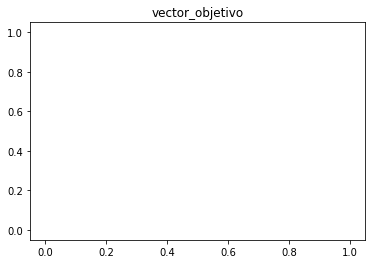

In [29]:
histograma(df, 'vector_objetivo')

# Alternativa: llevando el tiempo de estadia a años

In [35]:
df['Tiempo_Estadia_1']=df['Tiempo_Estadia']/365

In [36]:
df['Tiempo_Estadia_1'].head(30)

0      1.246575
1      8.252055
2      7.249315
3     10.419178
4      9.090411
5     12.005479
6     12.005479
7     10.252055
8      0.747945
9      8.252055
10    12.005479
11    12.005479
12     0.747945
13     2.832877
14    12.005479
15     0.495890
16     8.087671
17     2.084932
18    12.005479
19     9.252055
20    10.920548
21     4.164384
22    12.005479
23     2.747945
24    12.005479
25    12.005479
26    12.005479
27    10.501370
28    12.005479
29    12.005479
Name: Tiempo_Estadia_1, dtype: float64

In [37]:
#dias de reposo queda igual

df['DIAS_REP_1']=df['DIAS_REP']

In [38]:
#se calcula la primera tasa

df['tasa_1_1']= df['DIAS_REP_1']/df['Tiempo_Estadia_1']

In [40]:
#promedio de empleados queda igual

df['prom_emp_1']=df['prom_emp']

In [41]:
#calculamos el nuevo vector objetivo

df['vector_objetivo_1']= df['tasa_1_1']/df['prom_emp_1']

In [42]:
df['vector_objetivo_1'].head(50)

0     0.000000
1     0.279552
2     0.000000
3     0.000000
4     0.000000
5     0.428697
6     0.009799
7     0.295402
8     0.000000
9     0.805202
10    0.144279
11    0.058532
12    0.000000
13    0.000000
14    0.072804
15    0.000000
16    0.000000
17    0.000000
18    0.901440
19    5.317738
20    0.000000
21    1.168208
22    1.575977
23    0.036535
24    0.205517
25    0.008543
26    2.594601
27    0.454486
28    0.382913
29    0.713286
30    0.000000
31    0.187094
32    0.374829
33    0.373813
34    0.000000
35    0.000000
36    0.444242
37    0.080932
38    0.000000
39    2.524488
40    0.855880
41    0.000000
42    0.000000
43    0.362301
44    0.000000
45    0.013641
46    0.000000
47    0.000000
48    0.000000
49    0.006407
Name: vector_objetivo_1, dtype: float64

In [43]:
np.mean(df['vector_objetivo_1'])

inf

OverflowError: cannot convert float infinity to integer

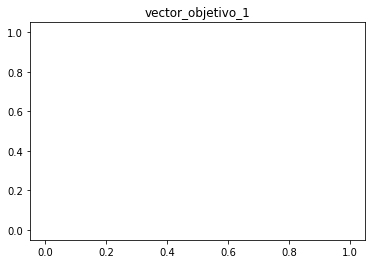

In [44]:
histograma(df, 'vector_objetivo_1')